In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

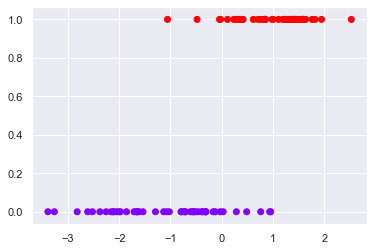

In [3]:
plt.scatter(x, y, c=y, cmap='rainbow')

# Split training and testing data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

# Instantiate an instance of the LogisticRegression class and call the fit function with the features

In [5]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\MOTANGER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
print(lr.coef_)
print(lr.intercept_)

[[1.94992297]]
[-0.08343792]


In [7]:
y_pred = lr.predict(x_test)

# Use a confusion matrix to measure the accuracy of our model.

In [8]:
confusion_matrix(y_test, y_pred)

array([[12,  1],
       [ 0, 12]], dtype=int64)

# Check the actual probability that a data point belongs to a given class, we can use the predict_proba function

In [10]:
lr.predict_proba(x_test)

array([[0.67648362, 0.32351638],
       [0.04685626, 0.95314374],
       [0.08581784, 0.91418216],
       [0.21414467, 0.78585533],
       [0.06321033, 0.93678967],
       [0.98509107, 0.01490893],
       [0.8347947 , 0.1652053 ],
       [0.06821885, 0.93178115],
       [0.3844012 , 0.6155988 ],
       [0.0616821 , 0.9383179 ],
       [0.38833911, 0.61166089],
       [0.66492321, 0.33507679],
       [0.16977666, 0.83022334],
       [0.75426011, 0.24573989],
       [0.38745871, 0.61254129],
       [0.99112135, 0.00887865],
       [0.04746274, 0.95253726],
       [0.69974861, 0.30025139],
       [0.13319535, 0.86680465],
       [0.81498638, 0.18501362],
       [0.11136872, 0.88863128],
       [0.98876278, 0.01123722],
       [0.76563921, 0.23436079],
       [0.96163748, 0.03836252],
       [0.9933018 , 0.0066982 ]])

#The first column corresponds to the probability that the sample belongs to the first class and the second column corresponds to the probability that the sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

In [12]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')

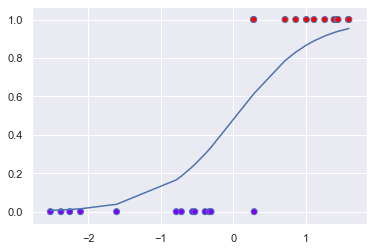

In [13]:
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')